In [126]:
%matplotlib inline

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.datasets import load_wine

In [128]:
num_points = 500
x = np.linspace(-3, 5, num_points)
y = 2 * x + 3
y_noise = np.random.normal(loc=0, scale=2, size=num_points)
y += y_noise

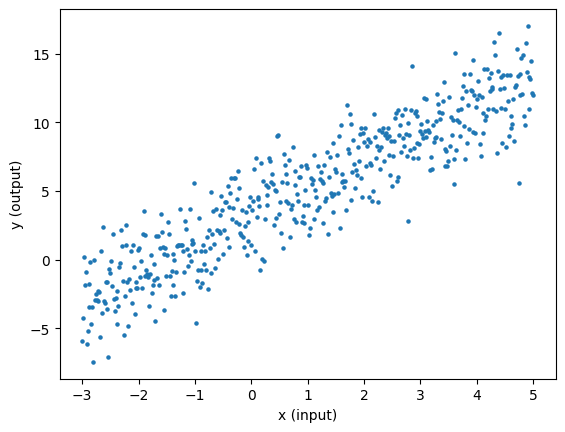

In [129]:
# plt.plot(x, y)
plt.scatter(x, y, s=5)
plt.xlabel("x (input)")
plt.ylabel("y (output)")
plt.show()

In [130]:
np.corrcoef(x, y)

array([[1.        , 0.91510363],
       [0.91510363, 1.        ]])

In [131]:
data = pd.DataFrame({"x": x, "y": y})
data = data.sample(len(data))
data.to_csv("data.csv", index=None)

In [132]:
data = pd.read_csv("data.csv")

In [133]:
x = data.x.values
y = data.y.values

In [134]:
# y = a_0 * [1] + a1 * x1 + a2 * x2 + ...

In [135]:
def modeling_function(x, a, b):
    return a * x + b

In [136]:
def mse(y, y_model):
    return ((y - y_model) ** 2).mean()

In [137]:
a, b = 5, 3
y_model = a * x + b

In [138]:
def plot_model(x, y, a, b):
    y_model = modeling_function(x, a, b)

    model_mse = mse(y, y_model)
    plt.scatter(x, y)
    plt.plot(x, y_model, c="r", label=f"y = {a}x + b; mse: {model_mse:.3}")
    plt.xlabel("x (input)")
    plt.ylabel("y (output)")
    plt.legend()

    plt.show()    

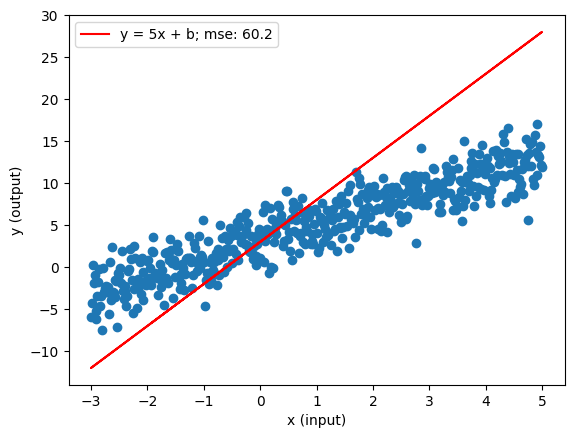

In [139]:
plot_model(x, y, 5, 3)

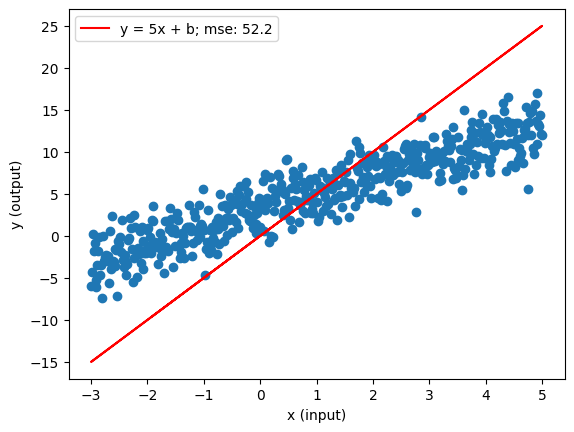

In [140]:
plot_model(x, y, 5, 0)

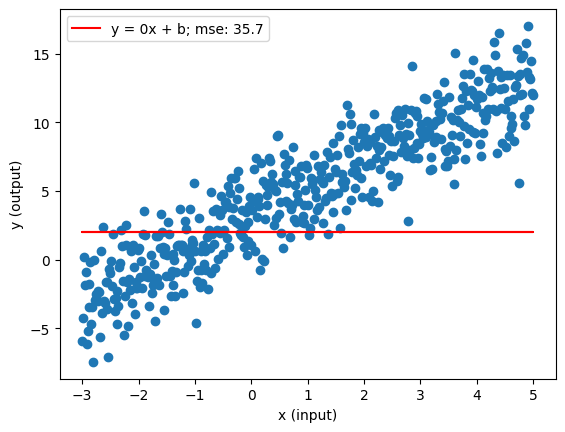

In [141]:
plot_model(x, y, 0, 2)

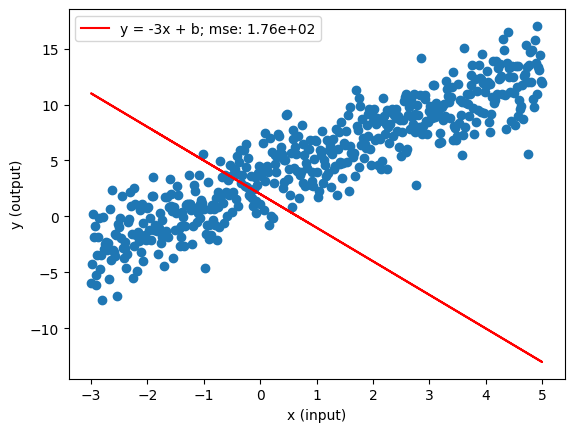

In [142]:
plot_model(x, y, -3, 2)

In [143]:
n_trials = 100
random_a = np.random.uniform(-5, 5, n_trials)
random_b = np.random.uniform(-5, 5, n_trials)

In [144]:
min_mse, best_a, best_b = 1e50, 0, 0

for current_a in random_a:
    for current_b in random_b:
        y_model = current_a * x + b
        current_mse = mse(y, y_model)
        if current_mse < min_mse:
            best_a = current_a
            best_b = current_b
            min_mse = current_mse
min_mse

4.207731505887241

In [145]:
best_a, best_b

(2.0347778498321354, -0.8986849329395898)

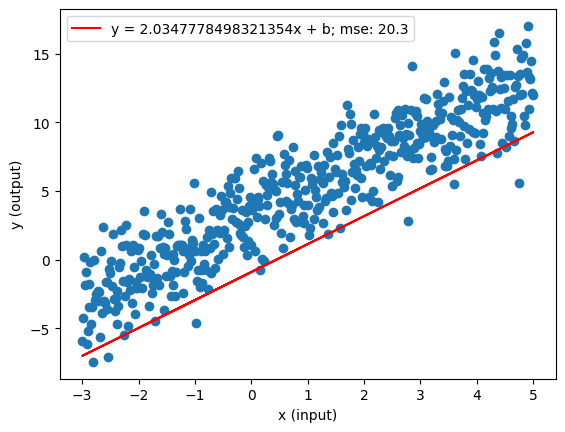

In [146]:
plot_model(x, y, best_a, best_b)


In [147]:
a, b = 5, 18
alpha = 0.01
a_gradient = -2 / len(x) * np.sum(x * ( y - (a * x + b)))
b_gradient = -2 / len(x) * np.sum( y - (a * x + b))

In [148]:
y_tilde = a * x + b
mse(y, y_tilde)

370.67105636698466

In [149]:
[a_gradient, b_gradient]

[67.74244078997324, 35.6948436955401]

In [150]:
new_a = a - alpha * a_gradient

In [151]:
new_b = b - alpha * b_gradient

In [152]:
y_tilde = new_a * x + new_b
mse(y, y_tilde)

315.5666786952098

In [153]:
new_a = a - alpha * a_gradient
new_b = b - alpha * b_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

315.5666786952098

In [154]:
new_a = a - alpha * a_gradient
new_b = b - alpha * b_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

315.5666786952098

In [155]:
for i in range(10):
    new_a = a - alpha * a_gradient
    new_b = b - alpha * b_gradient
    y_tilde = new_a * x + new_b
    print(mse(y, y_tilde))

315.5666786952098
315.5666786952098
315.5666786952098
315.5666786952098
315.5666786952098
315.5666786952098
315.5666786952098
315.5666786952098
315.5666786952098
315.5666786952098


In [156]:
y_tilde = new_a * x + new_b
print(mse(y, y_tilde))

315.5666786952098


In [157]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = 2 / len(x) * np.sum(x * (y -( a * x + b)))
    b_gradient = 2 / len(y) * np.sum(y -(a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)

In [158]:
model_a, model_b = -10, 20 # Start points; can be anywhere
all_errors = []
alpha = 0.01 # Learning rate
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x, y, model_a, model_b, alpha)
    if step % 100 == 0:
        y_model = model_a * x + model_b
        error = mse(y, y_model)
        all_errors.append(error)
        print("Step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b))

Step 0: a = -11.18898841775157, b = 20.0969484369554, J = 950.8054658366262
Step 100: a = -2122554.3392003337, b = -383352.28176014876, J = 30403874035560.04
Step 200: a = -459066967893.589, b = -82933444586.20044, J = 1.4222291951626102e+24
Step 300: a = -9.928791177847072e+16, b = -1.7937009532988748e+16, J = 6.6528886474033185e+34
Step 400: a = -2.147418593935137e+22, b = -3.8794518991071656e+21, J = 3.112081196567439e+45
Step 500: a = -4.6444794083969223e+27, b = -8.390555298420689e+26, J = 1.4557660419897089e+56
Step 600: a = -1.004517192686403e+33, b = -1.8147258954817325e+32, J = 6.809766953856745e+66
Step 700: a = -2.172589652520076e+38, b = -3.924925059908543e+37, J = 3.185465564401946e+77
Step 800: a = -4.698919871758599e+43, b = -8.488905550007972e+42, J = 1.4900937037564376e+88
Step 900: a = -1.0162916837791494e+49, b = -1.8359972824203505e+48, J = 6.970344526048715e+98
Step 1000: a = -2.1980557547411615e+54, b = -3.970931236302595e+53, J = 3.2605803708408162e+109
Final lin

In [159]:
len(all_errors)

11

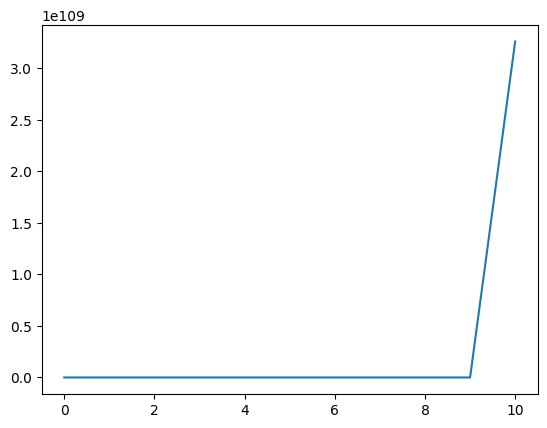

In [160]:
plt.plot(all_errors)

In [161]:
model_a, model_b = -10, 20 # Start points; can be anywhere
all_errors = []
alpha = 0.01 # Learning rate
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x, y, model_a, model_b, alpha)
    y_model = model_a * x + model_b
    error = mse(y, y_model)
    all_errors.append(error)
print("Final line: {} * x + {}".format(model_a, model_b))

Final line: -2.1980557547411615e+54 * x + -3.970931236302595e+53


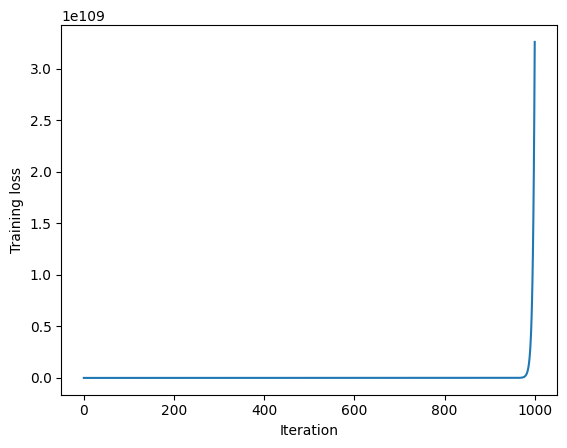

In [162]:
plt.plot(all_errors)

plt.xlabel("Iteration")
plt.ylabel("Training loss")

plt.show()

In [163]:
model_a, model_b

(-2.1980557547411615e+54, -3.970931236302595e+53)

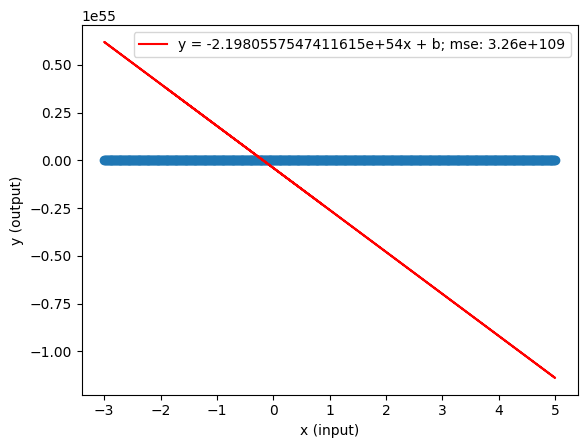

In [164]:
plot_model(x, y, model_a, model_b)

In [166]:
linear_regression = LinearRegression()

In [170]:
linear_regression.fit(x.reshape(-1, 1), y)

LinearRegression()

In [172]:
linear_regression.coef_, linear_regression.intercept_

(array([2.00753163]), 3.145046518645024)

In [174]:
predicted = linear_regression.predict(x.reshape(-1, 1))

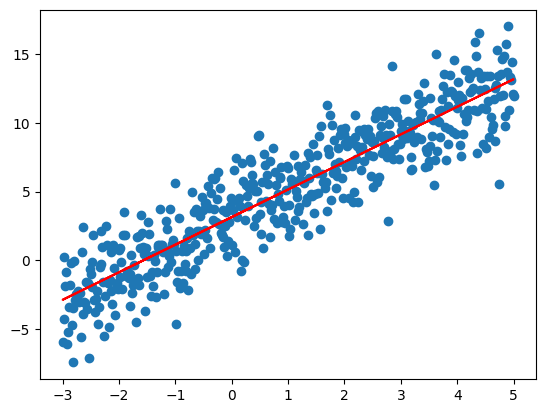

In [176]:
plt.scatter(x, y)
plt.plot(x, predicted, c="r")
plt.show()

In [178]:
linear_regression.score(x.reshape(-1, 1), y)

0.8374146583844562

In [179]:
r2_score(y, predicted)

0.8374146583844562

In [180]:
mean_squared_error(y, predicted)

4.189879492371607

In [181]:
np.sqrt(mean_squared_error(y, predicted))

2.0469195129197453

In [182]:
mean_absolute_error(y, predicted)

1.64158693956165

In [184]:
wine = load_wine()
wine_data = wine["data"]
wine_labels = wine["target"]

In [188]:
wine_data = pd.DataFrame(wine_data)
wine_data.columns = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanids", "Color intensity", "Hue", "OD280/OD315 of diluted wines" , "Praline"]

In [189]:
wine_data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanids,Color intensity,Hue,OD280/OD315 of diluted wines,Praline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [191]:
wine_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [192]:
logistic_regression = LogisticRegression()

In [193]:
logistic_regression.fit(wine_data, wine_labels)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
(logistic_regression.predict(wine_data) == wine_labels).sum() / len(wine_labels)

0.9662921348314607

In [205]:
accuracy_score(wine_labels, logistic_regression.predict(wine_data))

0.9662921348314607

In [209]:
wine_data_train, wine_data_test, wine_labels_train, wine_labels_test = train_test_split(wine_data, wine_labels, test_size=50)

In [210]:
len(wine_data)

178

In [211]:
len(wine_data_train), len(wine_data_test)

(128, 50)

In [217]:
logistic_regression_new = LogisticRegression(max_iter=500)

In [218]:
logistic_regression_new.fit(wine_data_train, wine_labels_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [215]:
logistic_regression_new.score(wine_data_train, wine_labels_train)

0.984375

In [216]:
logistic_regression_new.score(wine_data_test, wine_labels_test)

0.94